# Домашнее задание:
1) взять данные отсюда: https://github.com/Laggg/data--for--students (flight_delays.csv)

Задача: научиться предсказывать задержку (столбик *dep_delayed_15min*) рейса по имеющимся данным с помощью Дерева решений (или других алгоритмов).
Это задача бинарной классификации (будет/не будет задержка). Улучшить приведенный пример.

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import *
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import *

import warnings
warnings.filterwarnings('ignore')


import itertools
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

def plot_confusion_matrix(targets,predictions,classes,
                          normalize=False,title='Confusion matrix',
                          figsize=(4, 4), cmap=plt.cm.Reds):

    conf_matrix = confusion_matrix(y_true=targets, y_pred=predictions)

    if normalize:
        conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
        title = 'Normalized ' + title.lower()

    plt.figure(figsize=figsize)
    plt.imshow(conf_matrix, interpolation='nearest', cmap=cmap)
    plt.title(title)
    # plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = conf_matrix.max() / 2.
    for i, j in itertools.product(range(conf_matrix.shape[0]), range(conf_matrix.shape[1])):

        if normalize:
            value = '{} %'.format(format(conf_matrix[i, j] * 100, '.2f'))
        else:
            value = format(conf_matrix[i, j], fmt)

        plt.text(j,i,value,horizontalalignment="center",color="white" if conf_matrix[i, j] > thresh else "black")

        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        plt.tight_layout()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
path_to_file = 'flight_delays.csv'
data = pd.read_csv(path_to_file)
data
# Отделим столбик-таргет от признаков:
target = (data['dep_delayed_15min'] == 'Y').astype(int)

data = data.drop(['dep_delayed_15min'], axis=1)

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data.UniqueCarrier = labelencoder.fit_transform(data.UniqueCarrier)
data.Origin = labelencoder.fit_transform(data.Origin)
data.Dest = labelencoder.fit_transform(data.Dest)
data.Month=data.Month.apply(lambda x: int(x[2:]))
data.DayofMonth=data.DayofMonth.apply(lambda x: int(x[2:]))
data.DayOfWeek=data.DayOfWeek.apply(lambda x: int(x[2:]))
data.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance
0,8,21,7,1934,0,18,78,732
1,4,20,3,1548,18,217,171,834
2,9,2,5,1422,20,228,59,416
3,11,25,6,1015,15,78,175,872
4,10,7,6,1828,19,174,199,423


In [3]:
# возьмем несколько столбцов данных как признаки, по которым будем предсказывать:
X = data[['DepTime','Distance','UniqueCarrier','Origin','Dest']]
X['DepTime'] = X['DepTime']//100
X.head()

,DepTime,Distance,UniqueCarrier,Origin,Dest
0,19,732,0,18,78
1,15,834,18,217,171
2,14,416,20,228,59
3,10,872,15,78,175
4,18,423,19,174,199


In [0]:
# разделим выборку на обучающую и тестовую(валидационную, проверочную, отложенная)
x_train, x_test, y_train, y_test = train_test_split(X, target, test_size=0.1, random_state=42)

# обучим модель дерева на обучающей выборке и предскажем на отложенной:
model = DecisionTreeClassifier(max_depth=40, min_samples_split=2)
clf=DecisionTreeClassifier(criterion='gini')
params={'min_samples_split': range(1,10,1), 'max_depth': range(30,50,1)}
gscv_clf=GridSearchCV(clf, params, cv=5, scoring='precision')
gscv_clf.fit(x_train,y_train)
gscv_clf.best_params_
best_clf=gscv_clf.best_estimator_


In [9]:
best_clf

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=45, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
best_clf.fit(x_train, y_train)
y_pred = best_clf.predict(x_test)

Общее число совпадений 0.7955
Полнота охвата класса 1: 0.2872727272727273
Точность: 0.45106035889070145


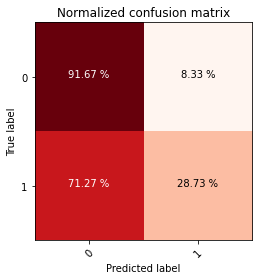

In [11]:
# матрица ошибок алгоритма. При хорошем прогнозе на главной диагонали будут стоять цифры, близкие к 100.
print('Общее число совпадений', accuracy_score(y_test, y_pred))
print('Полнота охвата класса 1:', recall_score(y_test, y_pred))
print('Точность:', precision_score(y_test, y_pred))
plot_confusion_matrix(y_test, y_pred, [0,1], normalize=True)

подсказка - для работы с категориальными признаками прочитайте про Label Encoder и OneHot Encoder

дедлайн - через неделю, 19.05.2020. Удачи!)